In [1]:
# MLP en Keras
# Red MLP para clasificar imágenes de números, utilizando la base MNIST con escalamiento y dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Cargamos la base MNIST
from keras.datasets import mnist

In [3]:
# usemos Keras para importar MNIST ya pre-mezclado

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test1 = X_test[:-10,:] # reservamos 10 imágenes para predicción
y_test1 = y_test[:-10]
X_predict = X_test[-10:,:] # las 10 imágenes para predicción

print("Base MNIST para entrenamiento con %d ejemplos" % len(X_train))
print("Base MNIST para pruebas con %d ejemplos" % len(X_test1))
print("%d Ejemplos para predicción" % len(X_predict))
X_train.shape

11501568/11490434 [==============================] - 0s 0us/step
Base MNIST para entrenamiento con 60000 ejemplos
Base MNIST para pruebas con 9990 ejemplos
10 Ejemplos para predicción


(60000, 28, 28)

In [4]:
# 2. Visualicemos las primeros nueve imágenes de conjunto de entrenamiento

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

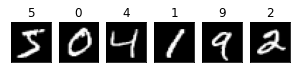

In [5]:
# veamos unas 6 imágenes
fig = plt.figure(figsize=(5,5))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))
plt.show()

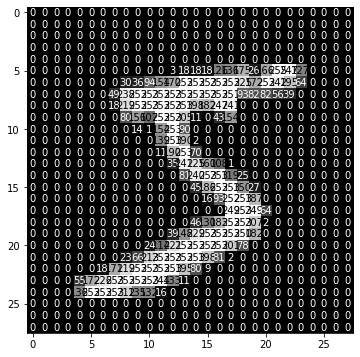

In [6]:
# 3. Una imagen en detalle

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)
plt.show()

In [7]:
# 4. Re-escalar las imágenes: dividir cada pixel en cada imagen para 255
#    re-escala [0,255] --> [0,1]

X_train = X_train.astype('float32')/255
X_test1 = X_test1.astype('float32')/255
X_predict = X_predict.astype('float32')/255

In [8]:
# 5. Codificar las etiquetas en categorías usando One-Hot 

from keras.utils import np_utils

# mostrar las primeras 10 etiquetas de entrenamiento (con valores enteros)
print('Etiquetas de las 10 primeras imágenes:')
print(y_train[:10])

# código one-hot de la etiqueta
y_train = np_utils.to_categorical(y_train, 10)
y_test1 = np_utils.to_categorical(y_test1, 10)

# mostrar las primeras 10 etiquetas de entrenameinto (one-hot)
print('Etiquetas de las 10 primeras imágenes en código one-hot:')
print(y_train[:10])

Etiquetas de las 10 primeras imágenes:
[5 0 4 1 9 2 1 3 1 4]
Etiquetas de las 10 primeras imágenes en código one-hot:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
#6. Definir la arquitectura del modelo

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# definir el modelo
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trai

In [10]:
# 7. Compilar el modelo

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# 8. Calcular la precisión del clasificador en el conjunto de pruebas (antes de entrenamiento)
# evaluar la precisión en el conjunto de prueba
score = model.evaluate(X_test1, y_test1, verbose=0)
accuracy = 100*score[1]

# mostrar la precisión del conjunto de prueba
print('Precisión en el conjunto de prueba: %.4f%%' % accuracy)

In [11]:
# 9. Entrenar el modelo

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/10
374/375 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.9146
Epoch 1: val_loss improved from inf to 0.11503, saving model to mnist.model.best.hdf5
375/375 [==============================] - 9s 20ms/step - loss: 0.2785 - accuracy: 0.9147 - val_loss: 0.1150 - val_accuracy: 0.9644
Epoch 2/10
373/375 [============================>.] - ETA: 0s - loss: 0.1100 - accuracy: 0.9657
Epoch 2: val_loss improved from 0.11503 to 0.09540, saving model to mnist.model.best.hdf5
375/375 [==============================] - 8s 21ms/step - loss: 0.1099 - accuracy: 0.9657 - val_loss: 0.0954 - val_accuracy: 0.9731
Epoch 3/10
373/375 [============================>.] - ETA: 0s - loss: 0.0784 - accuracy: 0.9762
Epoch 3: val_loss did not improve from 0.09540
375/375 [==============================] - 8s 23ms/step - loss: 0.0785 - accuracy: 0.9762 - val_loss: 0.1003 - val_accuracy: 0.9716
Epoch 4/10
374/375 [============================>.] - ETA: 0s - loss: 0.0613 - accuracy: 0.98

In [12]:
# 10. Cargar el modelo con la mejor precisión de clasificación en el conjunto de validación

# Cargar los pesos (parámetros) que produjeron la mejor precisión en validación
model.load_weights('mnist.model.best.hdf5')

In [13]:
# 11. Calcular la precisión en clasificación en el conjunto de prueba

score = model.evaluate(X_test1, y_test1, verbose=0)
accuracy = 100*score[1]

In [14]:
# mostrar la precisión en prubea
print('Precisión durante la prueba: %.4f%%' % accuracy)

Precisión durante la prueba: 97.9980%


In [15]:
# predicción con las 10 imágenes no vistas antes

result=model.predict(X_predict)
labels = (result > 0.5).astype(np.int)
print(labels)

[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


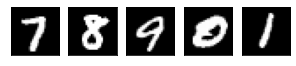

In [16]:
# graficar las 4 primeras imágenes nuevas
fig = plt.figure(figsize=(5,5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_predict[i], cmap='gray')
plt.show()